In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import joblib


In [ ]:
df = pd.read_csv("/content/Exam_Score_Prediction.csv")
print("Dataset Loaded Successfully")
print(df.head())


Dataset Loaded Successfully
   student_id  age  gender   course  study_hours  class_attendance  \
0           1   17    male  diploma         2.78              92.9   
1           2   23   other      bca         3.37              64.8   
2           3   22    male     b.sc         7.88              76.8   
3           4   20   other  diploma         0.67              48.4   
4           5   20  female  diploma         0.89              71.6   

  internet_access  sleep_hours sleep_quality   study_method facility_rating  \
0             yes          7.4          poor       coaching             low   
1             yes          4.6       average  online videos          medium   
2             yes          8.5          poor       coaching            high   
3             yes          5.8       average  online videos             low   
4             yes          9.8          poor       coaching             low   

  exam_difficulty  exam_score  
0            hard        58.9  
1        mod

In [ ]:
X = df.drop("exam_score", axis=1)
y = df["exam_score"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [ ]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object"]).columns

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

results = {}

In [ ]:
for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = [mae, rmse, r2]


In [ ]:
results_df = pd.DataFrame(results, index=["MAE", "RMSE", "R2 Score"])
print("\nMODEL PERFORMANCE COMPARISON")
print(results_df)



MODEL PERFORMANCE COMPARISON
          Linear Regression  Random Forest  Support Vector Regressor
MAE                7.863361       8.335601                 15.535882
RMSE               9.772594      10.326642                 18.911709
R2 Score           0.733004       0.701872                  0.000124


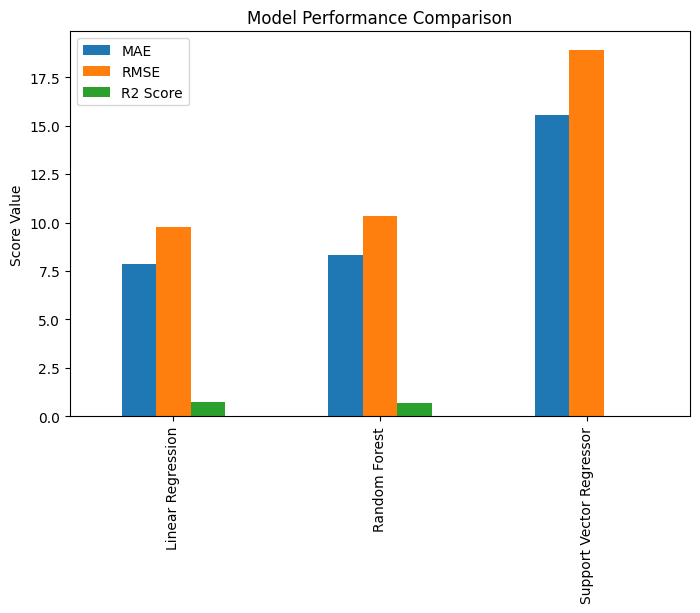

In [ ]:
results_df.T.plot(kind="bar", figsize=(8, 5), title="Model Performance Comparison")
plt.ylabel("Score Value")
plt.show()

In [ ]:
rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(random_state=42))
])

params = {
    "model__n_estimators": [50, 100],
    "model__max_depth": [None, 5, 10]
}

grid = GridSearchCV(rf_pipeline, params, cv=3, scoring="r2")
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
final_pred = best_model.predict(X_test)


FINAL TUNED RANDOM FOREST MODEL RESULTS
MAE : 8.273551895548682
RMSE: 10.233720233749013
R2 Score: 0.7072130193853429


In [ ]:
print("\nFINAL TUNED RANDOM FOREST MODEL RESULTS")
print("MAE :", mean_absolute_error(y_test, final_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, final_pred)))
print("R2 Score:", r2_score(y_test, final_pred))



FINAL TUNED RANDOM FOREST MODEL RESULTS
MAE : 8.273551895548682
RMSE: 10.233720233749013
R2 Score: 0.7072130193853429


In [ ]:
joblib.dump(best_model, "Final_Exam_Score_Model.pkl")
print("\nFinal Model Saved Successfully as Final_Exam_Score_Model.pkl")


Final Model Saved Successfully as Final_Exam_Score_Model.pkl
